In [47]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

import math

In [48]:
part1 = pd.read_csv('part1.csv')
part1

,voltage,min (mV),Max (mV)
0,1,-0.018,-0.013
1,2,-0.024,-0.012
2,3,-0.025,-0.006
3,4,-0.028,-0.004
4,5,-0.030,-0.001
5,6,-0.034,0.002
6,7,-0.036,0.004
7,8,-0.039,0.007
8,9,-0.044,0.012
9,10,-0.046,0.014


In [51]:
current = abs(part1['Max (mV)'] - part1['min (mV)'])/2/(0.3)
voltage = part1['voltage']*1000

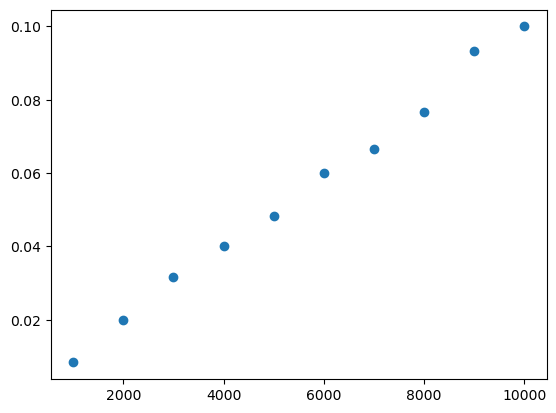

In [52]:
plt.scatter(voltage, current)

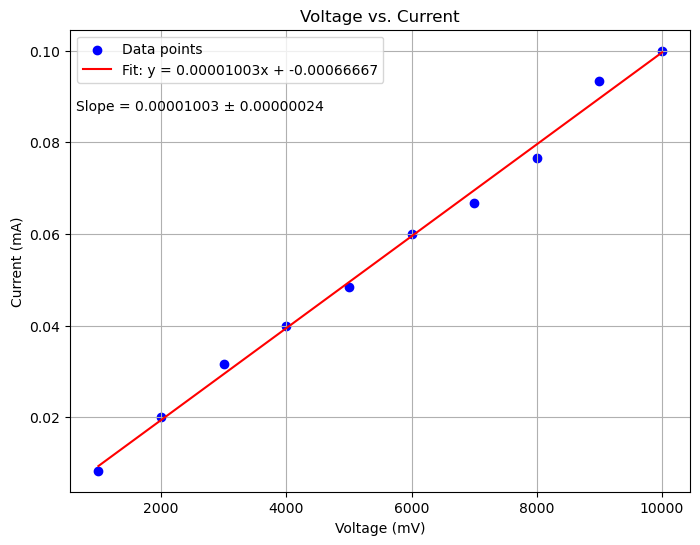

1.003030303030303e-05
2.433693697607473e-07


In [53]:
x = voltage
y = current
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create line for the fitted model
fit_line = slope * x + intercept

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, fit_line, color='red', label=f'Fit: y = {slope:.8f}x + {intercept:.8f}')
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (mA)')
plt.title('Voltage vs. Current')
plt.legend()

# Annotate the plot with slope and its error
plt.text(0.01, 0.85, f'Slope = {slope:.8f} ± {std_err:.8f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid()
plt.show()

print(slope)
print(std_err)

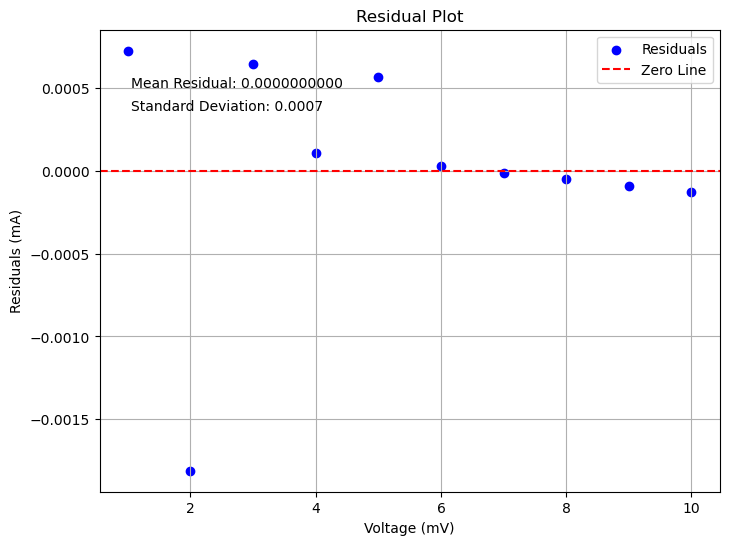

In [54]:
x = part1['voltage']
y = (part1['min (mV)'] + part1['Max (mV)']) / 2

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate predicted y values (fitted values)
y_pred = slope * x + intercept

# Calculate residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Voltage (mV)')
plt.ylabel('Residuals (mA)')
plt.title('Residual Plot')
plt.legend()

# Annotate with some residual stats
plt.text(0.05, 0.90, f'Mean Residual: {np.mean(residuals):.10f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.text(0.05, 0.85, f'Standard Deviation: {np.std(residuals):.4f}', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid()
plt.show()

# Calculating Error Propagation

In [55]:
from sympy import symbols, sqrt, diff

In [56]:
# Define f

A1, A2, l1, l2, R1, R2, n1, n2, omega = symbols('A1 A2 l1 l2 R1 R2 n1 n2 omega')
mu0, N2 = symbols('mu0 N2')

In [75]:
numerator = (-mu0 * n1 * A2 *N2)/(R1**2 + omega**2*(mu0*n1**2 *A1*l1)**2)**0.5*omega
denominator = (R2**2 + omega**2*(mu0 * n2**2 * A2 * l2)**2)**0.5
f = numerator / denominator
f

-A2*N2*mu0*n1*omega/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**0.5*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**0.5)

In [58]:
partial_A1 = diff(f, A1)
partial_A2 = diff(f, A2)
partial_l1 = diff(f, l1)
partial_l2 = diff(f, l2)
partial_R1 = diff(f, R1)
partial_R2 = diff(f, R2)
partial_n1 = diff(f, n1)
partial_n2 = diff(f, n2)
partial_omega = diff(f, omega)

partials = {
    'partial_A1': partial_A1,
    'partial_A2': partial_A2,
    'partial_l1': partial_l1,
    'partial_l2': partial_l2,
    'partial_R1': partial_R1,
    'partial_R2': partial_R2,
    'partial_n1': partial_n1,
    'partial_n2': partial_n2,
    'partial_omega': partial_omega,
}


In [59]:
partial_omega

1.0*A1**3*N2*l1**2*mu0**3*n1**5*omega**2/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**1.5*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**0.5) + 1.0*A1*A2**2*N2*l2**2*mu0**3*n1*n2**4*omega**2/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**0.5*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**1.5) - A1*N2*mu0*n1/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**0.5*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**0.5)

## Calcuating the Error

In [60]:
Alpha_A1, Alpha_A2, Alpha_l1, Alpha_l2, Alpha_R1, Alpha_R2, Alpha_n1, Alpha_n2, Alpha_omega = (
     0.02, 0.03, 0.01, 0.02, 0.01, 0.02, 0.1, 0.1, 0.01
)

# Values of variables (replace with actual values)
values = {
    A1: 1.0,
    A2: 1.0,
    l1: 1.0,
    l2: 1.0,
    R1: 1.0,
    R2: 1.0,
    n1: 1.0,
    n2: 1.0,
    omega: 1.0,
}

# Substitute values into partial derivatives
partials_evaluated = {
    name: partial.subs(values)
    for name, partial in partials.items()
}

# Calculate the squared contributions
squared_terms = [
    (partials_evaluated['partial_A1'] * Alpha_A1)**2,
    (partials_evaluated['partial_A2'] * Alpha_A2)**2,
    (partials_evaluated['partial_l1'] * Alpha_l1)**2,
    (partials_evaluated['partial_l2'] * Alpha_l2)**2,
    (partials_evaluated['partial_R1'] * Alpha_R1)**2,
    (partials_evaluated['partial_R2'] * Alpha_R2)**2,
    (partials_evaluated['partial_R2'] * Alpha_n1)**2,
    (partials_evaluated['partial_R2'] * Alpha_n2)**2,
    (partials_evaluated['partial_omega'] * Alpha_omega)**2,
]

# Sum the squared terms and take the square root
Delta_f = sqrt(sum(squared_terms))
Delta_f


0.143178210632764*sqrt(0.0682926829268293*N2**2*mu0**6/(1.0*mu0**2 + 1.0)**4.0 + N2**2*mu0**2/(1.0*mu0**2 + 1.0)**4.0 + 0.0195121951219512*(N2*mu0**3/(1.0*mu0**2 + 1.0)**2.0 - N2*mu0/(1.0*mu0**2 + 1.0)**1.0)**2 + 0.0195121951219512*(N2*mu0**3/(1.0*mu0**2 + 1.0)**2.0 - 0.5*N2*mu0/(1.0*mu0**2 + 1.0)**1.0)**2)

In [61]:
A1, A2, l1, l2, R1, R2, n1, n2, omega = symbols('A1 A2 l1 l2 R1 R2 n1 n2 omega')
Alpha_A1, Alpha_A2, Alpha_l1, Alpha_l2, Alpha_R1, Alpha_R2, Alpha_n1, Alpha_n2, Alpha_omega = symbols(
    'alpha_A1 alpha_A2 alpha_l1 alpha_l2 alpha_R1 alpha_R2 alpha_n1 alpha_n2 alpha_omega'
)

# Define the squared contributions
squared_terms = [
    (partial_A1 * Alpha_A1)**2,
    (partial_A2 * Alpha_A2)**2,
    (partial_l1 * Alpha_l1)**2,
    (partial_l2 * Alpha_l2)**2,
    (partial_R1 * Alpha_R1)**2,
    (partial_R2 * Alpha_R2)**2,
    (partial_n1 * Alpha_n1)**2,
    (partial_n2 * Alpha_n2)**2,
    (partial_omega * Alpha_omega)**2,
]

# Sum the squared terms and take the square root
Delta_f = sqrt(sum(squared_terms))
Delta_f

2.0*sqrt(0.25*A1**6*N2**2*alpha_l1**2*l1**2*mu0**6*n1**10*omega**6/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**3.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**1.0) + 0.25*A1**2*A2**4*N2**2*alpha_l2**2*l2**2*mu0**6*n1**2*n2**8*omega**6/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**1.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**3.0) + A1**2*A2**4*N2**2*alpha_n2**2*l2**4*mu0**6*n1**2*n2**6*omega**6/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**1.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**3.0) + 0.25*A1**2*A2**2*N2**2*alpha_A2**2*l2**4*mu0**6*n1**2*n2**8*omega**6/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**1.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**3.0) + 0.25*A1**2*N2**2*R1**2*alpha_R1**2*mu0**2*n1**2*omega**2/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**3.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**1.0) + 0.25*A1**2*N2**2*R2**2*alpha_R2**2*mu0**2*n1**2*omega**2/((A1**2*l1**2*mu0**2*n1**4*omega**2 + R1**2)**1.0*(A2**2*l2**2*mu0**2*n2**4*omega**2 + R2**2)**3.0) + 0.25*

In [79]:
values = {
    N2: 28,
    A1: 0.01353,
    A2: 0.00137,
    l1: 0.00674,
    l2: 0.00360,
    R1: 50.8,
    R2: 1.3,
    n1: 2373.89,
    n2: 7777.78,
    omega: 40*math.pi,
    Alpha_A1: sqrt(2)*0.005, 
    Alpha_A2: sqrt(2)*0.005, 
    Alpha_l1: 0.00001, 
    Alpha_l2: 0.00001, 
    Alpha_R1: 50.8*0.1, 
    Alpha_R2: 1.3*0.1, 
    Alpha_n1: 0.00674*1/sqrt(0.00001), 
    Alpha_n2: 0.00360*1/sqrt(0.00001), 
    Alpha_omega: 0.000001*2*math.pi,
    mu0: 1.25663706e-6 ,
    
}  # Replace these with your actual values

# Substitute numeric values
Delta_f_numeric = Delta_f.subs(values).evalf()

In [80]:
f.subs(values)


-0.000217603696297072

In [81]:
Delta_f_numeric

0.00116356332759372

In [28]:
4*math.pi*10**-7

1.2566370614359173e-06

In [30]:
V = 5.740
alpha_v = 0.001 
R = 0.3
alpha_r = 0.1*0.3
mu0 = 4*math.pi*10**-7
n2 = 28


def error_prop_part1():
    return math.sqrt((mu0 * n2 / R)**2 + (mu0 * n2 * V / R**2)**2)

error_prop_part1()

0.002247137417265857